<a href="https://colab.research.google.com/github/fahmiajik12/Python/blob/Master/DataMovie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analisis Data Eksplorasi

In [45]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data
data = pd.read_csv("movies.csv", sep = "," ,encoding='latin-1')
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [46]:
# Initial data dimensions
data.shape

(6820, 15)

In [47]:
# Copy data and clean
cleanData = data.copy()

# Subset data set for variables interested in
cleanData = cleanData[['name','country','gross','runtime','rating','released','year']]

# Create month, y2, T_year variable
cleanData["month"] = cleanData.released.astype(str).str[5:7]
cleanData["y2"] = cleanData.released.astype(str).str[:4]
cleanData["T_year"] = cleanData.year.astype(str) == cleanData.y2.astype(str)
cleanData = cleanData[cleanData.T_year == True]

# Filter for movie ratings, country, and year
cleanData = cleanData[cleanData['rating'].isin(['R', 'PG-13', 'PG', 'G'])]
cleanData = cleanData[cleanData.country == "USA"]
cleanData = cleanData[cleanData.year >= 2000] 

# Adjusting for inflation
# cleanData['adjusted'] = cleanData.apply(lambda x: cpi.inflate(x.gross, x.year, to = 2016), axis = 1)

cleanData.head()

,name,country,gross,runtime,rating,released,year,month,y2,T_year
3080,Requiem for a Dream,USA,3609278.0,102,R,2000-12-15,2000,12,2000,True
3081,Gladiator,USA,187705427.0,155,R,2000-05-05,2000,05,2000,True
3082,American Psycho,USA,15070285.0,102,R,2000-04-14,2000,04,2000,True
3083,The Patriot,USA,113330342.0,165,R,2000-06-28,2000,06,2000,True
3086,Remember the Titans,USA,115654751.0,113,PG,2000-09-29,2000,09,2000,True


In [48]:
# Data dimensions
cleanData.shape

(2131, 10)

Kumpulan data asli berisi 6820 observasi dengan 15 variabel. Dari 15 variabel, 7 digunakan dan 4 dibuat. Kumpulan data akhir memiliki 2131 observasi dan 12 variabel. Nama film disimpan sebagai pengenal serta negara asal. Negara disaring ke film di Amerika Serikat hanya untuk memiliki analisis yang lebih mendalam untuk . Kotor disesuaikan dengan inflasi hingga 2016 untuk membandingkan film secara akurat dari waktu ke waktu. Runtime dan rating disimpan karena variabel-variabel ini menggambarkan data yang tidak dapat disangkal untuk sebuah film. Peringkat disaring ke 4 label film besar di AS yaitu R, PG-13, PG, dan G. Dirilis dan tahun disimpan untuk melakukan analisis rangkaian waktu dengan tahun disaring dari 2000 hingga 2016 hanya karena menurut IMDb, data kotor mungkin tidak dapat diandalkan lebih dari 15 tahun yang lalu. Variabel lain seperti perusahaan dan direktur telah dihapus karena datanya tidak dapat diandalkan karena IMDb memiliki banyak daftar untuk kategori ini. Variabel lain yang berkaitan dengan waktu dibuat untuk analisis.

In [49]:
# Summary statistics
cleanData.describe(include = "all")

,name,country,gross,runtime,rating,released,year,month,y2,T_year
count,2131,2131,2.131000e+03,2131.000000,2131,2131,2131.000000,2131,2131,2131
unique,2127,1,NaN,NaN,4,1010,NaN,12,17,1
top,Death at a Funeral,USA,NaN,NaN,PG-13,2007-10-19,NaN,10,2007,True
freq,2,2131,NaN,NaN,931,7,NaN,235,143,2131
mean,NaN,NaN,6.148969e+07,106.416237,NaN,NaN,2007.874237,NaN,NaN,NaN
std,NaN,NaN,7.640650e+07,16.381310,NaN,NaN,4.822108,NaN,NaN,NaN
min,NaN,NaN,1.785000e+03,72.000000,NaN,NaN,2000.000000,NaN,NaN,NaN
25%,NaN,NaN,1.468506e+07,96.000000,NaN,NaN,2004.000000,NaN,NaN,NaN
50%,NaN,NaN,3.713422e+07,103.000000,NaN,NaN,2008.000000,NaN,NaN,NaN
75%,NaN,NaN,7.784244e+07,115.000000,NaN,NaN,2012.000000,NaN,NaN,NaN


In [50]:
# Load data set with adjusted gross 

cleanData = pd.read_csv("moviesAdjusted.csv")
cleanData.drop(cleanData.columns[[0]], axis=1, inplace=True)
cleanData.head()

,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
0,USA,3609278,102,R,12/15/2000,2000,12,2000,True,5.030499e+06,Break
1,USA,187705427,155,R,5/5/2000,2000,5,2000,True,2.616180e+08,Break
2,USA,15070285,102,R,4/14/2000,2000,4,2000,True,2.100449e+07,Session
3,USA,113330342,165,R,6/28/2000,2000,6,2000,True,1.579563e+08,Break
4,USA,115654751,113,PG,9/29/2000,2000,9,2000,True,1.611960e+08,Session


In [51]:
# Data dimensions
cleanData.shape

(2131, 11)

Kumpulan data akhir yang digunakan untuk analisis ini mencakup penyesuaian kotor terhadap inflasi serta variabel baru yang dibuat yang disebut "sekolah" dari plot berikut.

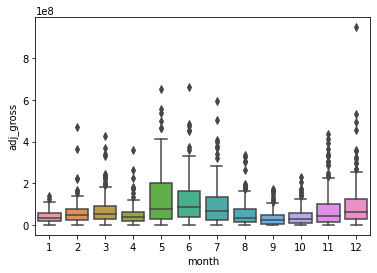

In [52]:
# Boxplot showing monthly significance WRT adjusted
ax = sns.boxplot(x="month", y="adj_gross", data=cleanData)
ax

Dari plot di atas, kita dapat melihat bahwa ada tren kurva seperti sinus dalam rata-rata penyesuaian bruto selama 12 bulan. Kami melihat peningkatan bertahap dari Januari hingga Maret, penurunan pada April, kemudian lonjakan mulai Mei yang secara bertahap menurun hingga September, kemudian mulai meningkat lagi secara bertahap hingga Desember, kemudian menurun lagi setelah Desember. Kami memperhatikan bahwa tren tersebut sesuai dengan tahun kalender akademik; sekolah biasanya dalam sesi selama bulan Januari, Februari, Maret, April, September, Oktober, dan November, dan istirahat biasanya selama bulan Mei, Juni, Juli, dan Agustus untuk musim panas dan Desember untuk musim dingin. Ini mungkin menunjukkan bahwa pendapatan kotor yang disesuaikan sebagian dipengaruhi oleh jumlah waktu luang yang mungkin dimiliki orang selama istirahat versus periode sesi sekolah. Lebih banyak orang, khususnya anak-anak dan remaja, kemungkinan besar berkontribusi secara signifikan terhadap pendapatan box office film.

In [53]:
# # Mapping for school timeline
# d = {"01" : "Session",
#      "02" : "Session",
#      "03" : "Session",
#      "04" : "Session",
#      "05" : "Break",
#      "06" : "Break",
#      "07" : "Break",
#      "08" : "Break",
#      "09" : "Session",
#      "10" : "Session",
#      "11" : "Session",
#      "12" : "Break"
#     }
# cleanData["school"] = cleanData.month.map(d)
cleanData.head()

,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
0,USA,3609278,102,R,12/15/2000,2000,12,2000,True,5.030499e+06,Break
1,USA,187705427,155,R,5/5/2000,2000,5,2000,True,2.616180e+08,Break
2,USA,15070285,102,R,4/14/2000,2000,4,2000,True,2.100449e+07,Session
3,USA,113330342,165,R,6/28/2000,2000,6,2000,True,1.579563e+08,Break
4,USA,115654751,113,PG,9/29/2000,2000,9,2000,True,1.611960e+08,Session


Karena boxplot di atas bulan dan bruto yang disesuaikan, kami membagi bulan menjadi dua kategori berdasarkan kalender akademik: Istirahat dan Sesi. Break mengacu pada liburan musim panas dan musim dingin pada bulan Mei, Juni, Juli, Agustus, dan Desember. Sesi mengacu pada bulan-bulan sekolah saat sesi: Januari, Februari, Maret, April, September, Oktober, dan November. Kami memberi label kolom "sekolah" dan tertarik menggunakan variabel ini dalam model kami.

In [54]:
# Counts tables
a = cleanData.groupby(["month","rating"])["rating"].count().unstack("rating")
a

rating,G,PG,PG-13,R
month,,,,
1,NaN,13.0,54.0,38.0
2,5.0,16.0,73.0,49.0
3,6.0,33.0,68.0,65.0
4,3.0,20.0,72.0,67.0
5,2.0,25.0,77.0,38.0
6,7.0,29.0,88.0,42.0
7,4.0,36.0,81.0,61.0
8,2.0,22.0,95.0,103.0
9,NaN,22.0,79.0,104.0


In [55]:
b = cleanData.groupby(["month","rating"])["adj_gross"].mean().unstack("rating")
b

rating,G,PG,PG-13,R
month,,,,
1,NaN,4.695986e+07,4.351039e+07,3.689816e+07
2,6.202234e+07,6.956051e+07,5.281129e+07,6.608015e+07
3,8.287840e+07,1.300977e+08,6.902750e+07,4.457727e+07
4,1.252032e+08,4.452984e+07,6.192946e+07,3.059325e+07
5,2.972653e+08,1.768033e+08,1.504329e+08,6.833027e+07
6,2.568366e+08,1.231001e+08,1.242787e+08,6.996290e+07
7,2.490553e+07,1.056873e+08,1.254652e+08,5.084414e+07
8,1.338093e+08,5.644589e+07,6.738411e+07,3.978311e+07
9,NaN,6.795202e+07,4.241084e+07,2.091445e+07


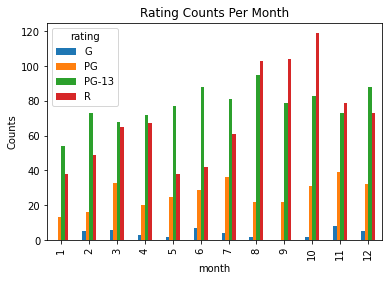

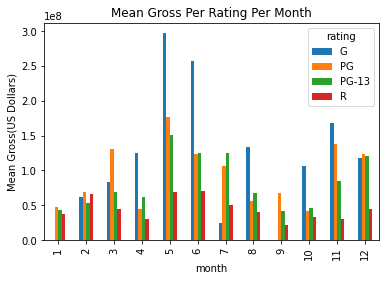

In [56]:
a.plot(kind = "bar")
plt.title("Rating Counts Per Month")
plt.ylabel("Counts")
b.plot(kind = "bar")
plt.title("Mean Gross Per Rating Per Month")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

In [57]:
cleanData[(cleanData.rating == "G") & (cleanData.month == 6)]

,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
684,USA,66023816,101,G,6/22/2005,2005,6,2005,True,81137624.2,Break
760,USA,244082982,117,G,6/9/2006,2006,6,2006,True,290583453.7,Break
890,USA,206445654,111,G,6/29/2007,2007,6,2007,True,238969442.2,Break
1028,USA,223808164,98,G,6/27/2008,2008,6,2008,True,249488051.8,Break
1313,USA,415004880,103,G,6/18/2010,2010,6,2010,True,456782093.7,Break
1466,USA,191452396,106,G,6/24/2011,2011,6,2011,True,204277227.2,Break
1712,USA,268492764,104,G,6/21/2013,2013,6,2013,True,276618186.2,Break


Dalam plot di atas, kita melihat jumlah film yang dirilis dan rata-rata kotor yang disesuaikan per rating selama 12 bulan, masing-masing. Kita dapat melihat lebih banyak film dengan rating R yang dirilis pada bulan Agustus, September, Oktober, dan November dibandingkan rating lainnya, yang kemungkinan bertepatan dengan rilis film Horror, Thriller, dan Misteri untuk musim seram; namun, film dengan peringkat R tampaknya memiliki pendapatan kotor yang disesuaikan paling rendah. Tampaknya film PG-13 terus-menerus dirilis dengan penurunan kecil di bulan Januari, dan tren bruto rata-rata yang disesuaikan mengikuti pola yang agak mirip sinus. Film berperingkat PG tampaknya mengikuti tren musiman dengan kenaikan bertahap kemudian penurunan mulai Januari, April, dan Agustus, dan rata-rata tren bruto yang disesuaikan mengikuti pola yang lebih mirip sinus juga. Jumlah film berperingkat G paling rendah, tetapi memiliki rata-rata kotor yang disesuaikan lebih tinggi, sebagian besar karena film Disney seperti yang terlihat pada tabel di atas.

In [58]:
c = cleanData.groupby(["year","rating"])["rating"].count().unstack("rating")
c

rating,G,PG,PG-13,R
year,,,,
2000,3.0,14.0,54.0,56.0
2001,4.0,12.0,54.0,55.0
2002,5.0,16.0,57.0,49.0
2003,4.0,20.0,63.0,42.0
2004,2.0,25.0,62.0,35.0
2005,3.0,22.0,57.0,40.0
2006,4.0,23.0,60.0,34.0
2007,3.0,20.0,50.0,70.0
2008,5.0,17.0,66.0,51.0


In [59]:
d = cleanData.groupby(["year","rating"])["adj_gross"].mean().unstack("rating")
d

rating,G,PG,PG-13,R
year,,,,
2000,9.376080e+07,9.282397e+07,8.298663e+07,4.403239e+07
2001,1.747532e+08,9.183829e+07,7.464366e+07,4.034013e+07
2002,9.433136e+07,1.065047e+08,9.196278e+07,3.559744e+07
2003,1.751695e+08,8.378559e+07,7.908211e+07,6.167113e+07
2004,1.769523e+08,9.724263e+07,8.160975e+07,5.216879e+07
2005,9.249294e+07,8.794812e+07,7.663532e+07,3.921058e+07
2006,1.399472e+08,8.472929e+07,7.343745e+07,3.947016e+07
2007,1.297718e+08,1.076149e+08,9.056306e+07,2.968645e+07
2008,1.186398e+08,9.056637e+07,7.754464e+07,3.160127e+07


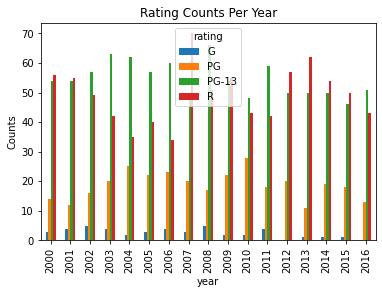

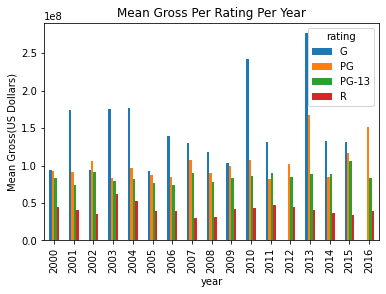

In [60]:
c.plot(kind = "bar")
plt.title("Rating Counts Per Year")
plt.ylabel("Counts")
d.plot(kind = "bar")
plt.title("Mean Gross Per Rating Per Year")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

In [61]:
cleanData[(cleanData.rating == "G") & (cleanData.year == 2003)]

,country,gross,runtime,rating,released,year,month,y2,T_year,adj_gross,school
385,USA,380843261,100,G,5/30/2003,2003,5,2003,True,4.967666e+08,Break
447,USA,85336277,85,G,10/31/2003,2003,10,2003,True,1.113114e+08,Session
499,USA,47887943,72,G,2/14/2003,2003,2,2003,True,6.246436e+07,Session
503,USA,23103423,75,G,3/21/2003,2003,3,2003,True,3.013578e+07,Session


Dalam plot di atas, kita melihat jumlah film yang dirilis dan rata-rata disesuaikan gross per rating sepanjang tahun 2000 hingga 2016, masing-masing. Secara umum, ada lebih banyak film PG-13, diikuti oleh rating-R, kemudian PG, dan terakhir G. Tampaknya tren PG-13 mengikuti kurva kasar seperti sinus, tren rating-R mengikuti kurva seperti cosinus , tren peringkat PG mengikuti kurva yang agak mirip kosinus, dan tren peringkat G mengikuti kurva seperti sinus. Meskipun ada lebih sedikit film berperingkat G yang dirilis selama bertahun-tahun, pendapatan kotor rata-rata yang disesuaikan biasanya lebih tinggi daripada semua peringkat lainnya. Rata-rata pendapatan kotor yang disesuaikan untuk film dengan rating PG mengikuti di belakang, kemudian film PG-13, dan terakhir film dengan rating R.

In [62]:
e = cleanData.groupby(["school","rating"])["rating"].count().unstack("rating")
e

rating,G,PG,PG-13,R
school,,,,
Break,20,144,429,317
Session,24,174,502,521


In [63]:
f = cleanData.groupby(["school","rating"])["adj_gross"].mean().unstack("rating")
f

rating,G,PG,PG-13,R
school,,,,
Break,1.675699e+08,1.180207e+08,1.158749e+08,5.038284e+07
Session,1.140052e+08,8.647984e+07,5.723812e+07,3.450457e+07


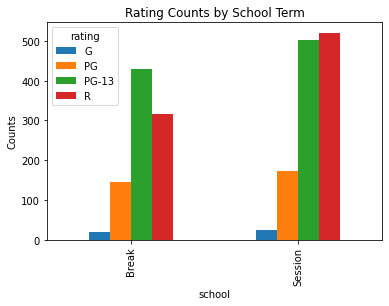

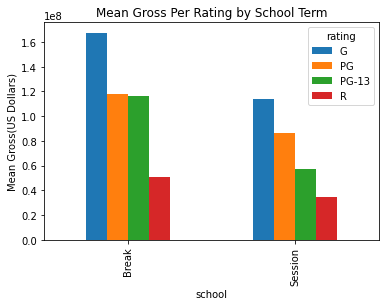

In [64]:
e.plot(kind = "bar")
plt.title("Rating Counts by School Term")
plt.ylabel("Counts")
f.plot(kind = "bar")
plt.title("Mean Gross Per Rating by School Term")
plt.ylabel("Mean Gross(US Dollars)")
plt.show()

Dalam plot di atas, kita melihat jumlah film dan rata-rata disesuaikan gross per rating antara Break dan Session. Tampaknya ada lebih sedikit film berperingkat R yang dirilis saat istirahat, kemungkinan karena anak-anak yang lebih muda memiliki lebih banyak waktu luang dan mereka cenderung tidak menonton film berperingkat R. Jumlah film untuk film dengan rating G, PG, dan PG-13 relatif sama antara Break dan Session. Dalam plot rata-rata yang disesuaikan kotor, kita dapat melihat bahwa film-film dengan rating G paling kotor selama istirahat, kemungkinan karena penonton yang lebih muda memiliki lebih banyak waktu untuk pergi ke bioskop. Rata-rata pendapatan kotor yang disesuaikan juga lebih tinggi di film dengan rating Break untuk PG dan PG-13, kemungkinan karena alasan yang sama untuk film dengan rating G. Film berperingkat R juga memiliki rata-rata kotor yang lebih tinggi selama Istirahat.

In [65]:
# Verify NaN's are because of 0 counts and not missing values
print(cleanData[(cleanData.rating == "G") & (cleanData.year == "2012")])

Empty DataFrame
Columns: [country, gross, runtime, rating, released, year, month, y2, T_year, adj_gross, school]
Index: []


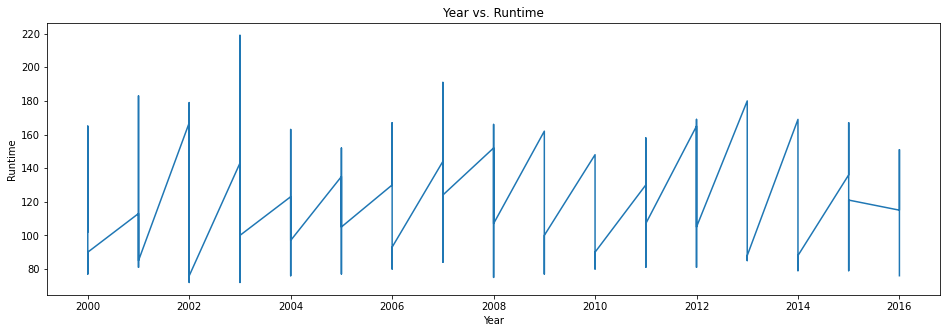

In [66]:
# Time analyzing year vs runtime
def plot_df(data, x,y, title="", xlabel='Year', ylabel='Runtime'):
    plt.figure(figsize=(16,5))
    plt.plot(x,y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(cleanData, x=cleanData['year'], y=cleanData['runtime'], title='Year vs. Runtime')  

Dari plot di atas, kita dapat melihat sedikit penurunan runtime secara umum sepanjang tahun 2000 hingga 2016. Sebelum menyaring tahun, kami juga menghasilkan plot serupa tetapi dari tahun 1986 hingga 2016. Kami melihat peningkatan yang lebih nyata dari 1986 ke awal 1990-an kemudian penurunan mulai awal 1990-an hingga 2016 di plot itu, tren melengkung yang mirip dengan distribusi miring ke kanan. Tampaknya runtime film perlahan-lahan menurun atau menyatu menjadi sekitar 2,5 jam.

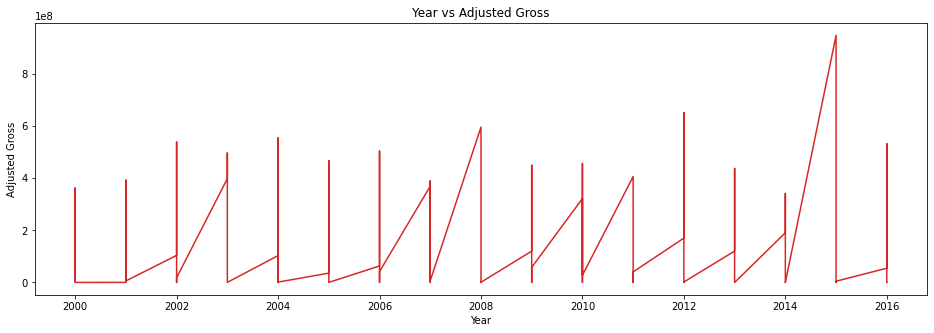

In [67]:
# Time analyzing year vs adjusted gross
def plot_df(data, x,y, title="", xlabel='Year', ylabel='Adjusted Gross'):
    plt.figure(figsize=(16,5))
    plt.plot(x,y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(cleanData, x=cleanData['year'], y=cleanData['adj_gross'], title='Year vs Adjusted Gross') 

Dari plot di atas, kita dapat melihat tingkat penyesuaian gross yang secara umum merata dengan beberapa tonjolan dan penurunan yang relatif kecil; namun, ada lonjakan besar dalam pendapatan kotor yang disesuaikan dari 2014 hingga 2015. Hal ini mungkin disebabkan oleh rilis film-film yang terkait dengan waralaba besar seperti The Avengers, Star Wars, Jurassic World, X-Men, dan Transformers. Menariknya, antara tahun 2007 dan 2010, kami memperkirakan penurunan yang lebih nyata karena Resesi Hebat. Namun, tampaknya ada lonjakan kecil dari 2007 hingga 2008, salah satu tahun tersulit selama resesi. Dari sudut pandang psikologis, ini mungkin karena orang ingin melarikan diri dari masalah yang timbul dari pukulan finansial, sehingga mereka terus sering pergi ke bioskop meskipun mungkin mengalami kesulitan keuangan.

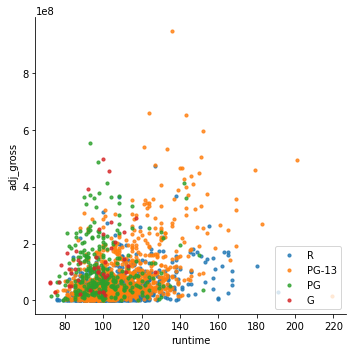

In [68]:
# Plot time showing insight on the breakdown of variables
order = ['R', 'PG-13', 'PG', 'G']
sns.lmplot( x="runtime", y="adj_gross", data=cleanData, fit_reg=False, hue='rating', hue_order = order,col_order = order, legend=False, scatter_kws={"s": 10})
plt.legend(loc='lower right')

Dalam scatterplot di atas, tampaknya film dengan rating PG-13 dan R memiliki runtime yang lebih lama sementara film dengan rating G dan PG biasanya memiliki runtime yang lebih pendek dalam rentang 2 jam atau di bawahnya. Film G, PG, dan PG-13 tampaknya memiliki penyesuaian gross yang agak lebih tinggi seiring meningkatnya runtime, tetapi film dengan rating R tidak memiliki kemiringan yang kuat yang menunjukkan tren positif yang kuat.

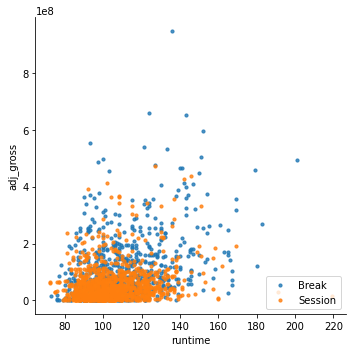

In [69]:
sns.lmplot( x="runtime", y="adj_gross", data=cleanData, fit_reg=False, hue='school', legend=False, scatter_kws={"s": 10})
plt.legend(loc='lower right')

Dalam scatterplot di atas, tampaknya film yang dirilis selama Istirahat tampaknya memiliki runtime yang lebih lama dan gross yang disesuaikan lebih tinggi sedangkan film yang dirilis selama Session biasanya memiliki runtime yang lebih pendek dan gross yang disesuaikan lebih rendah. Ini mungkin karena lebih banyak orang memiliki lebih banyak waktu luang selama istirahat ke bioskop yang sering dibandingkan waktu sekolah.

## Data Modeling

## Linear Regression

Dalam STATS 100B dan STATS 101A, kami diajarkan bahwa regresi linier harus mengikuti asumsi yang berasal dari Kondisi Gauss-Markov. Yaitu linearitas, independensi, normalitas, dan homoskedastisitas. Kami ingin prediktor kami tidak multikolinear satu sama lain, kesalahan menjadi independen, dan residu tersebar secara acak tanpa pola melintasi plot yang dipasang vs sisa.

In [70]:
cleanData = pd.read_csv("moviesAdjusted.csv", encoding="latin-1")
cleanData.head()

## Linear Regression ##
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = smf.ols('np.sqrt(adj_gross) ~ np.sqrt(runtime) + C(rating) + C(school) - 1', 
               data = cleanData).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.sqrt(adj_gross)   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     171.6
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          1.36e-153
Time:                        13:38:25   Log-Likelihood:                -20549.
No. Observations:                2131   AIC:                         4.111e+04
Df Residuals:                    2125   BIC:                         4.114e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(rating)[G]         -7647.1981   1207.820     -6.331      0.000      -1e+04   -5278.565
C(rating)[PG]        -1.006e+04   1116.123     -9.013      0.000   -1.22e+04   -7871.124
C(rating)[PG-13]     -1.197e+04   1148.151    -10.423      0.000   -1.42e+04   -9715.470
C(rating)[R]         -1.441e+04   1139.937    -12.640      0.000   -1.66e+04   -1.22e+04
C(school)[T.Session] -1473.6069    164.991     -8.931      0.000   -1797.168   -1150.046
np.sqrt(runtime)      1997.3170    108.479     18.412      0.000    1784.581    2210.053
==============================================================================
Omnibus:                      144.706   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.942
Skew:                           0.615   Prob(JB):                     4.20e-41
Kurtosis:                       3.762   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ringkasan statistik untuk model linier ini menunjukkan bahwa dengan asumsi ambang $\alpha = 0,05$, semua prediktor dianggap signifikan. Ini berarti bahwa peringkat film, waktu tayangnya, dan apakah film tersebut dirilis selama Istirahat atau Sesi, semuanya dapat menjelaskan beberapa variabilitas dalam pendapatan kotor yang disesuaikan.

Kami mengubah model dengan rooting kuadrat variabel respon disesuaikan kotor dan rooting kuadrat salah satu variabel prediktor, runtime. Hal ini dilakukan untuk mencapai hasil diagnostik yang lebih baik untuk OLS, terutama untuk meningkatkan multikolinearitas dan normalitas kesalahan.

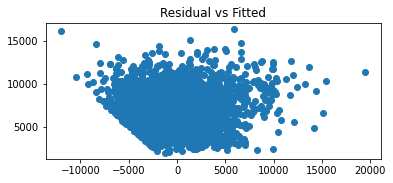

In [71]:
# Model Diagnostics: Linearity and Equal Variance
pred_val = model.fittedvalues.copy()
true_val = np.sqrt(cleanData['adj_gross']).values.copy()
residual = true_val - pred_val
fit, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)
plt.title("Residual vs Fitted")
plt.show()

Plot diagnostik di atas untuk linearitas dan homoskedastisitas tampaknya mengikuti sifat residu yang tersebar. Namun, tampaknya ada batas di kuadran ke-3 plot, sehingga ini mungkin menunjukkan bahwa asumsi varians konstan tidak sepenuhnya tercapai.

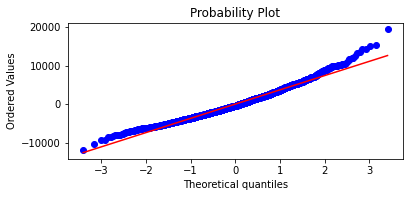

In [72]:
# Model Diagnostics: Normality
import scipy as sp
fig, ax = plt.subplots(figsize=(6, 2.5))
_, (_, __, r) = sp.stats.probplot(residual, plot=ax, fit=True)

Plot diagnostik di atas untuk normalitas menunjukkan bahwa sebagian besar titik tampaknya terletak di atas garis qq normal, yang menunjukkan bahwa kondisi normalitas terpenuhi.

In [73]:
# Fitting an ANOVA Model
atab = sm.stats.anova_lm(model, typ = 2) ; atab

,sum_sq,df,F,PR(>F)
C(rating),7.180125e+09,4.0,128.686802,1.687850e-98
C(school),1.112707e+09,1.0,79.770584,8.890786e-19
np.sqrt(runtime),4.728679e+09,1.0,339.001662,2.333284e-70
Residual,2.964128e+10,2125.0,NaN,NaN


Kolom `PR(>F)` dari tabel ANOVA memberi tahu kita bahwa semua prediktor -- `rating`, `school`, dan `sqrt(runtime)` semuanya signifikan secara statistik.

#### Temuan

Sebuah model OLS sederhana cocok dalam dataset untuk menunjukkan sejauh mana faktor-faktor tertentu yaitu peringkat film, runtime, dan periode rilisnya, mempengaruhi variabilitas dalam bruto (disesuaikan) dari sebuah film.

## Memasang Model menggunakan Respon Biner

Satu pengamatan mencolok yang kami lihat selama analisis data eksplorasi adalah jumlah penjualan kotor yang dicapai dari semua film yang dikelompokkan setiap bulannya. Karena itu kami ingin menyesuaikan model yang sama-sama melayani untuk mengetahui klasifikasi biner film, mengingat fitur-fiturnya.

Kami bertanya pada diri sendiri, "Jika saya adalah seorang produser film, apakah saya harus peduli kapan waktu di mana saya harus merilis film saya?" Kami menambahkan kolom `sekolah` (dengan kategori biner -- *Istirahat* atau *Sesi*) dalam kumpulan data karena sebagai siswa, kita tahu bahwa ada bulan-bulan tertentu di mana sekolah sedang istirahat atau dalam sesi.

Mengingat pengetahuan kami sebelumnya sebagai siswa yang menjalani pendidikan semester dan triwulan, kami memutuskan bahwa biasanya bulan *Istirahat* adalah bulan Juni, Juli, Agustus, dan Desember; sedangkan bulan-bulan lainnya ada di *Sesi*.

Kami ingin tahu seberapa besar kemungkinan sebuah film dirilis selama *Break* atau *Session* dengan penyesuaian gross, rating, runtime, bulan, dan tahun film tersebut dirilis.

### Logistic Regression

Seperti yang telah kita pelajari di kelas statistik, regresi logistik sangat bagus ketika mencoba menyesuaikan variabel biner (0 atau 1, *Break* atau *Sesi*). Kami telah mengkodekan variabel kategori ke dalam variabel dummy. Contoh, rating dengan 4 faktor dalam 1 kolom akan dikodekan menjadi 4 kolom dengan masing-masing kolom diberi label 0 atau 1. 

In [74]:
# # Start with preprocessing the data set #
cleanData = pd.read_csv("moviesAdjusted.csv", encoding="latin-1")
cleanData['adj_gross_sq'] = np.sqrt(cleanData['adj_gross'])
data2 = cleanData

In [75]:
## Logistic Regression ## 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

school_map = {'Break':0, 'Session':1}
data2['school_map'] = data2['school'].map(school_map)
data2['rating'] = data2['rating'].astype('category')
data2['month'] = data2['month'].astype('category')
data2['year'] = data2['year'].astype('category')

# Create dummy variables
cat_vars = ['rating', 'month']
dummy = pd.get_dummies(data2[cat_vars])
data2 = pd.concat([data2, dummy], axis=1)

In [76]:
# Training and Testing (75/25)
X = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R',
           'month_1','month_2','month_3','month_4','month_5','month_6',
          'month_7','month_8','month_9','month_10','month_11','month_12',]]

X_breaks_only = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R',
                    'month_6','month_7','month_8','month_12']]

X_no_month = data2[['adj_gross_sq','runtime','rating_G','rating_PG','rating_PG-13','rating_R']]

y = data2['school_map']

# X_no_month
X_train,X_test,y_train,y_test = train_test_split(X_no_month ,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

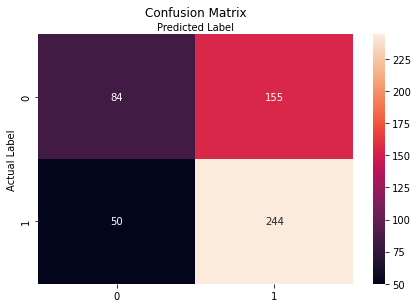

In [77]:
## Confusion Matrix
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
conf_matrix

# Plot Confusion Matrix
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6153846153846154
Precision: 0.6115288220551378
Recall: 0.8299319727891157


#### Temuan

Kami memutuskan untuk memasukkan tiga set prediktor:
- `X` mencakup semua prediktor
- `X_breaks_only` tidak menyertakan variabel dummy dengan bulan yang ada di *Sesi*.
- `X_no_month` hanya memiliki gross, runtime, dan rating yang disesuaikan (dikodekan ke dalam variabel dummy -- rating_G, rating_PG-13, rating_PG, rating_G)

Seperti yang diharapkan, menggunakan `X` dan `X_breaks_only` menghasilkan prediksi film mana yang ada di *Break* dan film mana yang ada di *Sesi*. Meskipun tidak menggunakan bulan sama sekali menghasilkan tingkat akurasi sekitar 62%.

Baik untuk dicatat bahwa tingkat akurasi ini dicapai dengan pendekatan set validasi menggunakan batas pemisahan kereta/pengujian arbitrer pada 75%/25%.

### Pengelompokan K-Means

Algoritme K-Means adalah jenis model pembelajaran mesin tanpa pengawasan yang berusaha mempelajari, dari sifat-sifat data, pembagian optimal atau pelabelan diskrit kelompok titik. Artikel oleh Jake VanderPlas yang merupakan penulis **Python Data Science Handbook** ini menjelaskan K-Means Clustering secara mendalam: <https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html>

Dalam kasus kami, kami ingin mengetahui bagaimana algoritme dapat mengklasifikasikan kumpulan data kami ke dalam dua kategori -- keduanya dapat berhubungan dengan *Break* dan *Session*. Input untuk klasterisasi K-Means adalah semua variabel numerik, sehingga setiap variabel kategori harus dikonversi menjadi angka.

In [79]:
def rating_to_numeric(x):
    if x == 'PG-13':
        return 4
    if x == 'PG':
        return 3
    if x == 'R':
        return 2
    if x == 'G':
        return 1

def school_to_numeric(x):
    if x == 'Session':
        return 1
    if x == 'Break':
        return 0

data2['rating_num'] = data2['rating'].apply(rating_to_numeric)
data2['school_num'] = data2['school'].apply(school_to_numeric)
data2_num = data2[['adj_gross', 'runtime', 'month', 'year', 'rating_num']]

In [80]:
## K Means Clustering ##
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters = 2, random_state = 0)

# Fitting the input data
clusters = kmeans.fit(data2_num)

# Getting the cluster labels
labels = kmeans.predict(data2_num)

# Centroid values
centroids = kmeans.cluster_centers_

from sklearn.metrics import accuracy_score
1 - accuracy_score(data2['school_num'], labels) 

0.3707179727827311

In [81]:
## Confusion Matrix ##

from sklearn.metrics import confusion_matrix
from sklearn import metrics
conf_matrix = metrics.confusion_matrix(data2['school_num'], labels)
conf_matrix

array([[ 203,  707],
       [  83, 1138]])

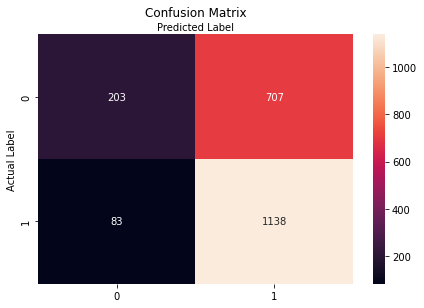

In [82]:
# Plot Confusion Matrix
class_names = [1,0] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Heatmap 
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.show()

In [83]:
print(pd.DataFrame(labels)[0].value_counts(),"\n\n",data2['school'].value_counts())

1    1845
0     286
Name: 0, dtype: int64 

 Session    1221
Break       910
Name: school, dtype: int64


#### Findings

Menggunakan algoritma pengelompokan tanpa pengawasan menghasilkan tingkat akurasi sekitar 63%, yang merupakan beberapa poin persentase dari model regresi logistik yang tidak menggunakan bulan (`X_no_month`).

Dari EDA kami, kami tahu bahwa ada 57% (1221) film ada di *Sesi* dan 43% film diklasifikasikan sebagai *Break*. Label K-Means mengklasifikasikan film menjadi 0 atau 1 dengan yang pertama menempati 13% (286) dari prediksi dan yang terakhir menempati 87% (1845). Dari matriks konfusi, sepertinya tingkat akurasi mungkin dibalik sehingga tingkat akurasi menjadi `1 - 63% = 37%`.

## Conclusion

Setelah melakukan analisis data eksplorasi kami, kami dapat melihat beberapa pola dan tren yang menarik. Misalnya, temuan yang paling menarik adalah signifikansi antara bruto yang disesuaikan dan bulan dalam setahun. Dari temuan ini, kami mengembangkan pertanyaan panduan: apakah ada signifikansi dalam variabel yang kami pilih sehubungan dengan penyesuaian kotor, dan apa yang dapat kami simpulkan dari hubungan antara variabel-variabel ini? Kami menemukan bahwa tren yang terlihat dalam hubungan antara bulan dan gross yang disesuaikan mengikuti kalender akademik di mana gross yang disesuaikan lebih tinggi selama bulan-bulan liburan musim panas dan musim dingin dibandingkan selama bulan-bulan sekolah saat sesi. Melalui pemodelan data, kami menemukan bahwa variabel "sekolah" (berasal dari bulan), "peringkat", dan "runtime" signifikan secara statistik sehubungan dengan penyesuaian kotor. Temuan kami menunjukkan bahwa film yang dirilis selama Istirahat lebih banyak daripada yang dirilis selama Sesi; ini mungkin karena lebih banyak orang (umumnya penonton yang lebih muda) memiliki lebih banyak waktu untuk menonton film di bioskop. Penonton yang lebih muda sering kali memiliki orang yang menemani saat pergi ke bioskop, jadi peringkat yang tidak terlalu ketat umumnya memiliki pendapatan kotor yang disesuaikan lebih tinggi karena setidaknya dua tiket (satu untuk anak, satu untuk pendamping) biasanya dijual per anak yang pergi menonton film di bioskop, yang mungkin menyebabkan kotor yang lebih besar. Oleh karena itu, kami menyimpulkan bahwa ada signifikansi statistik dalam variabel yang kami pilih melalui EDA (runtime, rating, periode rilis), dan ada hubungan yang signifikan antara variabel-variabel ini dan gross yang disesuaikan, seperti yang terlihat dalam pemodelan data kami.